
# **The Sparks Foundation**

## **Author: Paridhi Sanghvi**

## **TSF_Task-3 Exploratory Data Analysis - Retail**


*   Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

*   As a business manager, try to find out the weak areas where you can work to make more profit
*   What all business problems you can derive by exploring the data?

*   I used Python
*   Dataset: https://bit.ly/3i4rbWl


In [1]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [5]:
sample = pd.read_csv("/SampleSuperstore.csv")
sample

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# **EDA Part**

In [7]:
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
sample.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [9]:
sample.shape

(9994, 13)

In [10]:
sample.size

129922

In [12]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
sample.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [17]:
for u in sample.columns:
  print(u,len(sample[u].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [19]:
sample.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **No null values are present in Dataset**

# **Data Visualization Part**
There are 3 categories in which Office Supplies Category has highest counts

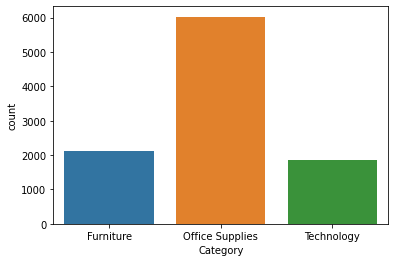

In [20]:
sns.countplot(sample["Category"])

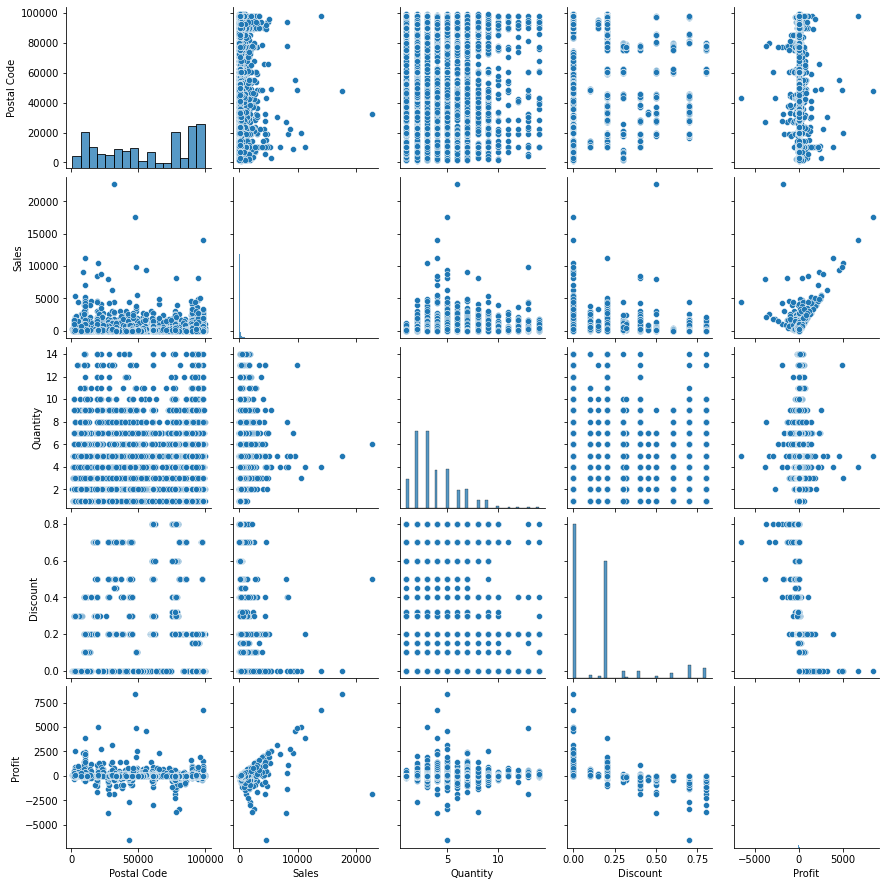

In [22]:
sns.pairplot(data = sample)


# **Heatmap of correlation**




*   Lightest color shows the perfect positive correlation
*   The darkest part show no correlation at all

*   Profit and sales has nearly 60% of correlation








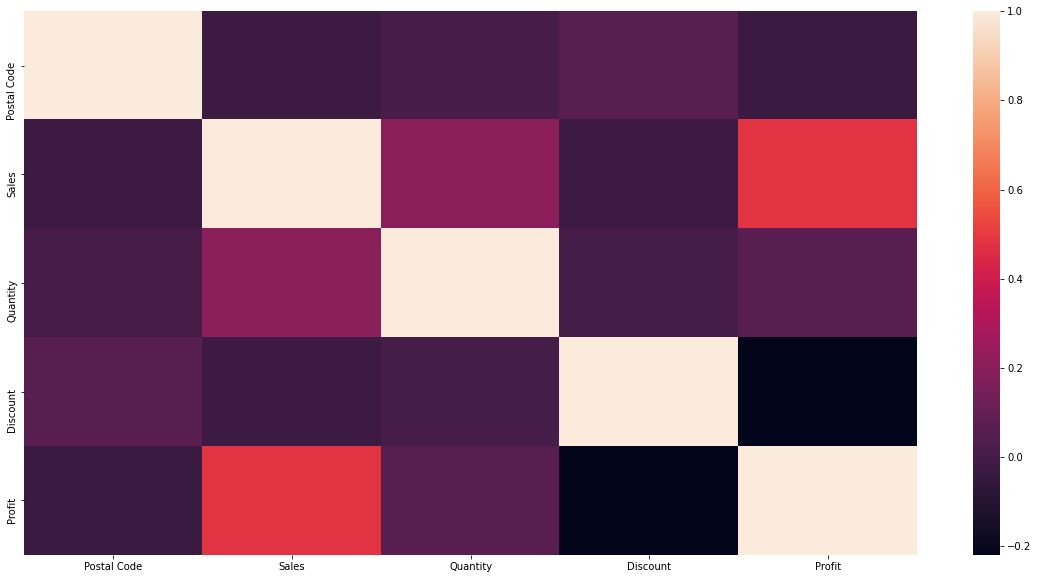

In [25]:
#Heatmap showing data correlation
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(sample.corr())
plt.show()

# **Barplot showing the relation between the sales and profits grouping by Sub-Categories**

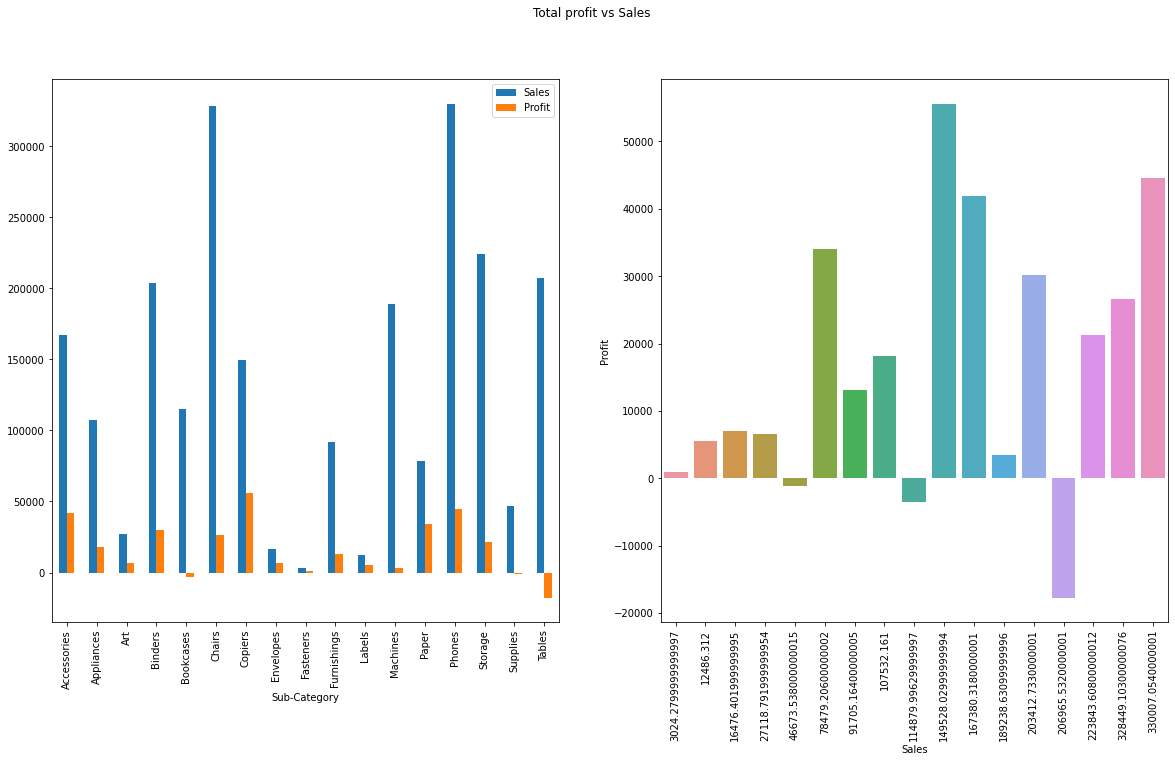

In [28]:
fig,axes = plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Total profit vs Sales")
sns.barplot(data = sample.groupby("Sub-Category")["Sales","Profit"].agg(sum), x = "Sales",y = "Profit",ax = axes[1])
sample.groupby("Sub-Category")["Sales","Profit"].agg(sum).plot(kind = "bar",ax = axes[0])
plt.xticks(rotation =90)
plt.show()

# **Barplot showing the relation between the sales and Quantity grouping by Sub-Categories**

*   Sales is high over less Quantity
*   The maximum quantity of product in demand is in the range 2-5




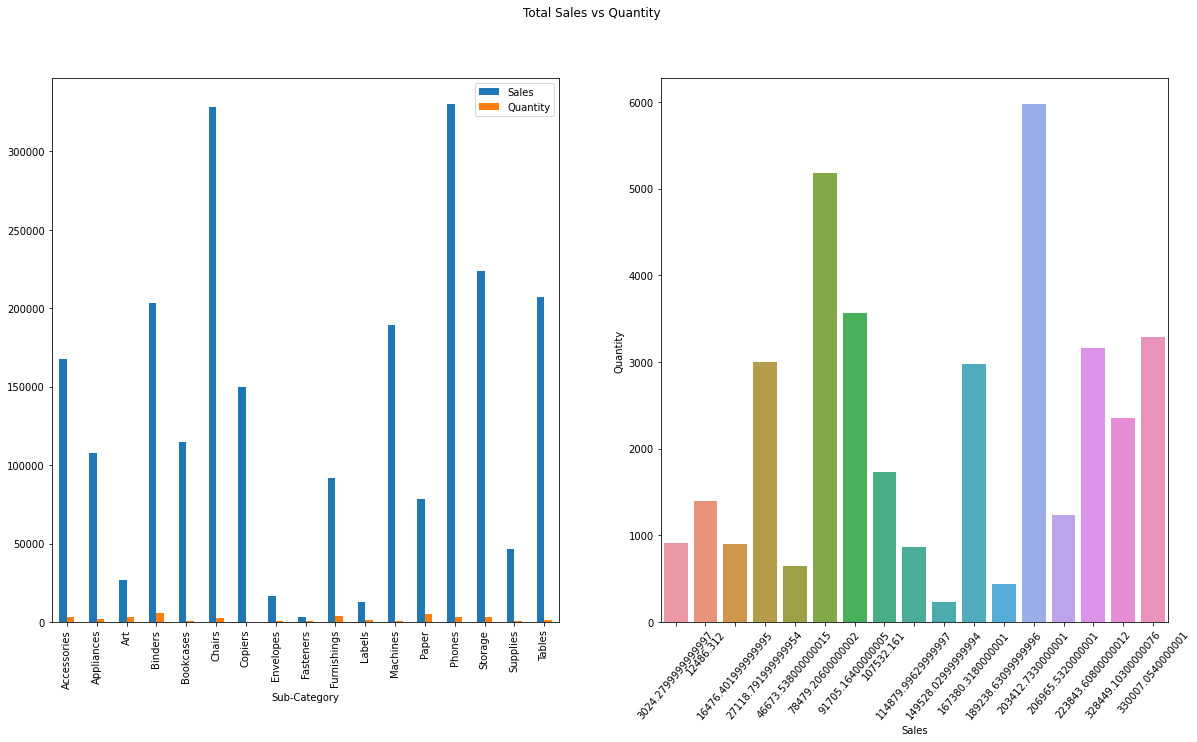

In [30]:
fig,axes = plt.subplots(1,2,figsize=(20,10))
fig.suptitle("Total Sales vs Quantity")
sns.barplot(data = sample.groupby("Sub-Category")["Sales","Quantity"].agg(sum), x = "Sales",y = "Quantity",ax = axes[1])
sample.groupby("Sub-Category")["Sales","Quantity"].agg(sum).plot(kind = "bar",ax = axes[0])
plt.xticks(rotation =50)
plt.show()

# **Plot showing relation between Profit, Quantity and Discount followed by their Sub-Catgeory**


*   The features Profit and Discounts are highly related
*   In the Sub Category tables the loss is maximum followed by bookcases





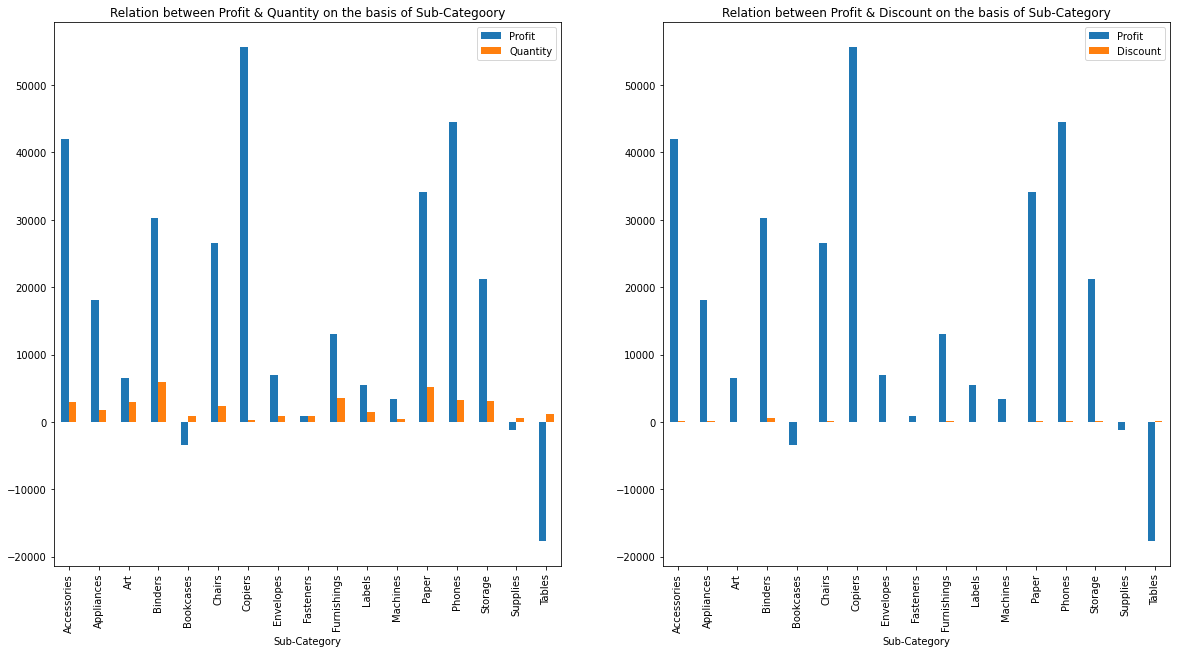

In [31]:
fig,axes = plt.subplots(1,2,figsize=(20,10))
sample.groupby("Sub-Category")["Profit","Quantity"].agg(sum).plot(kind = "bar",ax = axes[0]).set_title("Relation between Profit & Quantity on the basis of Sub-Categoory")
sample.groupby("Sub-Category")["Profit","Discount"].agg(sum).plot(kind = "bar",ax = axes[1]).set_title("Relation between Profit & Discount on the basis of Sub-Category")
plt.xticks(rotation =90)
plt.show()

# **Countplot Based on different Regions**

*   Quantity of 3 is max followed by 2
*   Quantity of 13 is minimum





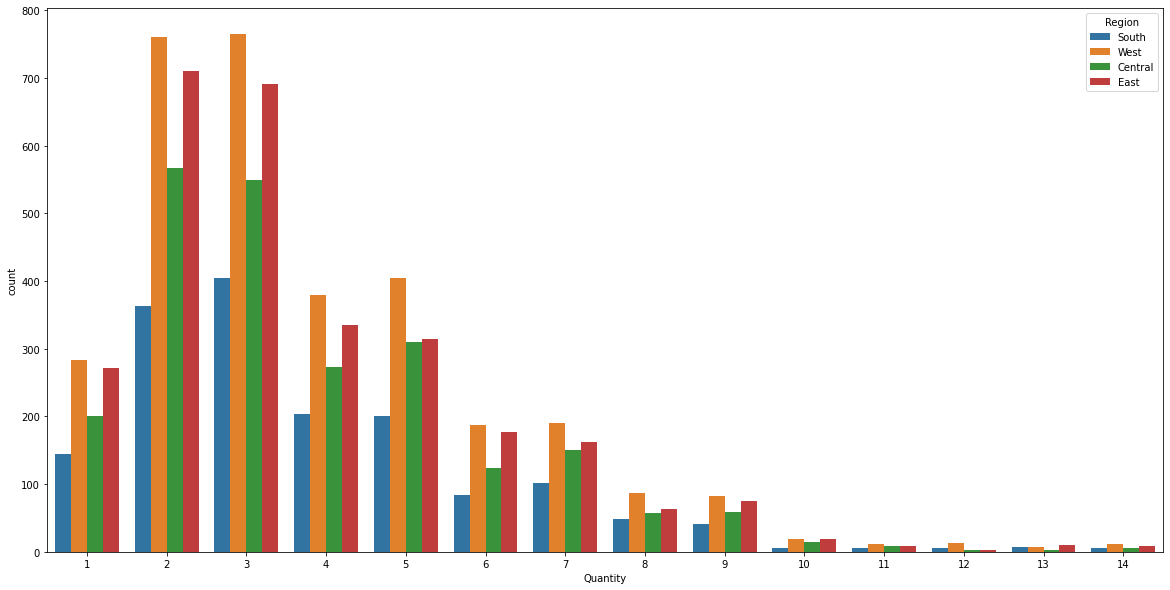

In [33]:
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.countplot(sample["Quantity"],hue = sample["Region"])
plt.show()

# **Sales with different Shipping Models and Segments**


*   The mode of shipping does not affect much to the sales
*   Home office provides highest sales with slight variation.




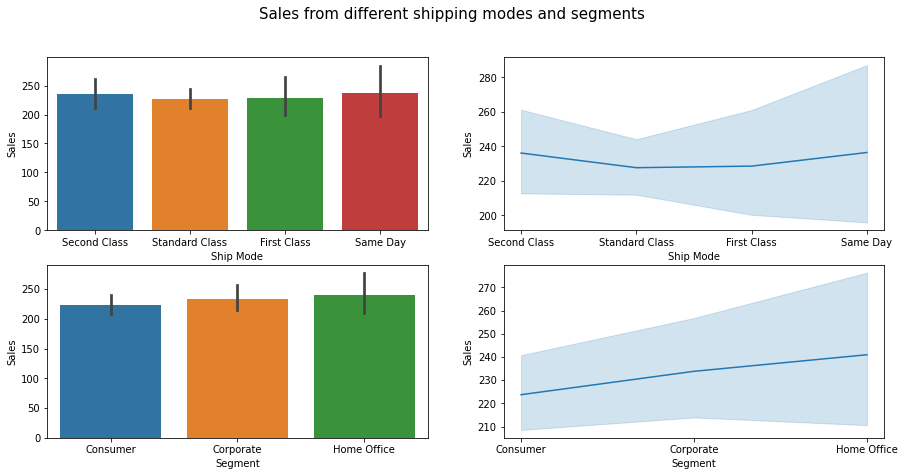

In [35]:
fig,axes = plt.subplots(2,2,figsize=(15,7))
fig.suptitle("Sales from different shipping modes and segments",fontsize=15)
sns.barplot(sample["Ship Mode"],sample["Sales"],ax = axes[0,0])
sns.lineplot(sample["Ship Mode"],sample["Sales"],ax = axes[0,1])
sns.barplot(sample["Segment"],sample["Sales"],ax = axes[1,0])
sns.lineplot(sample["Segment"],sample["Sales"],ax = axes[1,1])
plt.show()